# 0. Import and Install Dependencies

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install tensorflow

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

# 1. Load and Study Data

In [4]:
#Find data path
cwd = os.getcwd()
file_path = os.path.join(cwd, 'emotions.csv')
file_path

'C:\\Users\\jmsi\\emotions.csv'

In [5]:
df = pd.read_csv('C:\\Users\\jmsi\\emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [6]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [7]:
df.shape

(2132, 2549)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [9]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [10]:
# These checks help in identifying imbalanced datasets (dataset is balanced)
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [11]:
#Checking the dataset for missing values (no missing values)
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(col)

In [12]:
# Checking the total number of Categorical features in dataset
for col in df.columns:
    if(df[col].dtype=='object'):
        print(col)

label


# 2. Identifying the top-features related to our dataset

In [13]:
#Separating features and columns. We get a "df_fea" that refers to the features and a "y" that refers only to the output 
df_fea=df.drop('label',axis=1)
y=df['label']

In [14]:
#mutual_info_classif helps in defining the % of dependence between features and target variables
mi_score=mutual_info_classif(df_fea,y)

#We get a 1-dimensional array with 2548 elements. Minus one element relative to the total number of columns of the dataset, which makes sense.

In [15]:
#Converting the labels to one-hot encoded ([0,1]) format
y=pd.get_dummies(df['label'])

In [16]:
#Converting the scores to pandas-series and choosing the columns as the index of respected score
mi_score=pd.Series(mi_score,index=df_fea.columns)
mi_score=(mi_score*100).sort_values(ascending=False)

In [17]:
#Check how many features are there with less than 10% relation with the label
indices = mi_score[mi_score < 10].index
len(indices)

366

In [18]:
#get the indices of the top-relation features, assuming the last 367 columns were dropped due to irrelevancy
top_fea = mi_score[:-367].index

# 3. Scale the data

### Scaling the dataset is a preprocessing step that is used to standardize the range of the features in a dataset so that each feature contributes equally to the analysis. The main reason for scaling the dataset is to avoid features with high values dominating the analysis and to make the optimization of the machine learning models easier and faster.

In [19]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df_fea[top_fea]) #because the StandardScaler() expects a 2D array like (df, numpy array, etc), we should use df_fea[top_fea].
df_sc.shape

(2132, 2181)

# 4. Splitting the dataset

### We will be splitting the dataset into 3 parts: training set, validation set and test set (27%), into a total of 6 variables.
### The training set is used to train the model, the validation set is used to tune the hyperparameters of the model (such as the learning rate, batch size, or the number of hidden layers) and the test set is used to evaluate the performance of the model. The validation set is a subset of the training set.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df_sc, y, random_state = 108, test_size = 0.27)
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, random_state = 108, test_size = 0.27)

# 5. Building the Network

### 5.1. Import the required dependencies

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers

### 5.2 Creating the layers

In [22]:
model = keras.Sequential([
    layers.Dense(units = 2181, input_shape = (2181,), activation='relu'), #Create the input layer. Receives the number of neurons, the shape of the input data and the activation funtion. 
    layers.BatchNormalization(), #Normalize it, so that each individual input has approximately the same impact
    layers.Dropout(0.27), #Dropout a certain percentage of each input to avoid overfitting

#Repeat the pattern
    layers.Dense(units = 3181, activation = 'relu'), #Common approach where the number of units is gradually increased or decreased in each layer so that the model learns new features in each layer.
    layers.BatchNormalization(),
    layers.Dropout(0.3), #The percentage is random. It has nothing to do with the test_size (which is 27%)
    
    layers.Dense(units = 4181, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    
    layers.Dense(units = 2581, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    
    layers.Dense(units = 2381, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    
    layers.Dense(units = 2181, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    
    layers.Dense(units = 3, activation = 'softmax') #Softmax activation is appropriate for multiclass-identification
])

#Defining an Adam optimizer. 
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07) #Learning rate determines the step size at which the optimizer should move towards the minimum, beta_1=0.9, beta_2=0.999 which are the exponential decay rates for the first and second moment estimates of the gradient, and epsilon=1e-07 which is a very small number used for stability.
adamax = keras.optimizers.Adamax(learning_rate=0.00085, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#Compile the model
model.compile(optimizer=adamax, loss='categorical_crossentropy', metrics=['accuracy']) #Specifing the optimizer, the loss function and the metrics in use.

#Train the model. 
#First of all, we need to create a variable that stops the training process once no improvements are being made:
call=callbacks.EarlyStopping(patience=10,min_delta=0.0001,restore_best_weights=True) #Patience: the train will stop after 10 epochs with no improvement; Min_delta: the metric has to increase at least 0.001 to be considered an improvement; Restore_best_weights: the weights of the model will be restored once the training has stopped.

#Use the fit method on the model:
history=model.fit(X_tr,Y_tr, validation_data=(X_val,Y_val), batch_size=28,epochs=50, callbacks=[call]) #Epochs: number of iterations the model will be trained on the data; Callbacks: is a list of functions that will be called after each epoch. In this case, we're only using the 'call' function.


Epoch 1/50
41/41 [==============================] - 24s 536ms/step - loss: 1.2299 - accuracy: 0.8123 - val_loss: 5.6619 - val_accuracy: 0.5701
Epoch 2/50
41/41 [==============================] - 21s 502ms/step - loss: 0.5663 - accuracy: 0.8952 - val_loss: 3.3278 - val_accuracy: 0.7933
Epoch 3/50
41/41 [==============================] - 21s 516ms/step - loss: 0.4543 - accuracy: 0.8978 - val_loss: 0.7055 - val_accuracy: 0.9216
Epoch 4/50
41/41 [==============================] - 21s 521ms/step - loss: 0.3322 - accuracy: 0.9013 - val_loss: 0.7177 - val_accuracy: 0.7886
Epoch 5/50
41/41 [==============================] - 21s 515ms/step - loss: 0.3525 - accuracy: 0.8987 - val_loss: 0.2957 - val_accuracy: 0.9240
Epoch 6/50
41/41 [==============================] - 22s 527ms/step - loss: 0.2710 - accuracy: 0.9233 - val_loss: 0.2008 - val_accuracy: 0.9026
Epoch 7/50
41/41 [==============================] - 21s 522ms/step - loss: 0.1862 - accuracy: 0.9330 - val_loss: 0.1958 - val_accuracy: 0.9311

### 5.3 Evaluate the Model

In [23]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

18/18 [==============================] - 1s 34ms/step - loss: 0.0794 - accuracy: 0.9774
Test Loss:  0.07938457280397415
Test Accuracy:  0.9774305820465088


### 5.4 Plot the Model

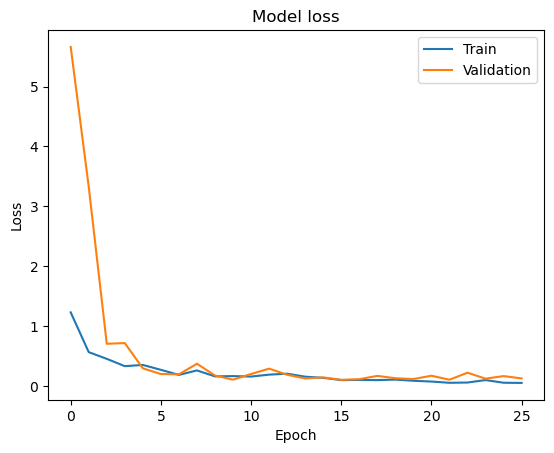

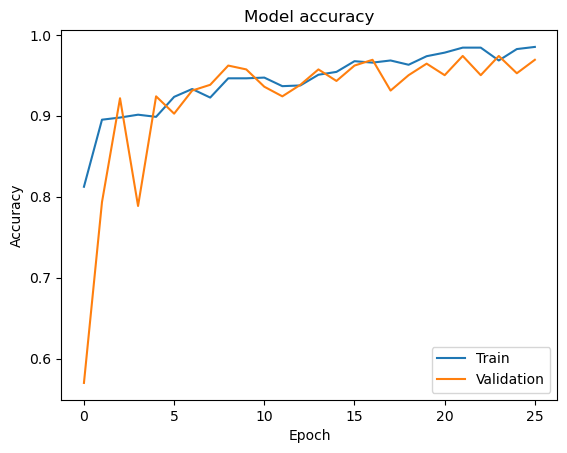

In [24]:
# Plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


# 6. Testing the Neural Network

In [25]:
# Make a prediction using the model
prediction = model.predict(X_test[1].reshape(1, -1))

# Print the predicted class
print("Predicted class:", np.argmax(prediction))


# Print the actual class
print("Actual class:", np.argmax(Y_test.values[1]))

1/1 [==============================] - 0s 152ms/step
Predicted class: 2
Actual class: 2


## 6.1 Final Comment
If our predicted class is 0, it means the maximum value of the one-hot encoded vector it's on index 0. Therefore, it means that output = [1, 0, 0] -> Positive. 
The same logic can be applied for class 1 and class 2